In [1]:
import sys
from pathlib import Path
import os 
sys.path.append('/home/gridsan/dykim/.local/lib/python3.9/site-packages/')

current_path = Path.cwd()

# Go to top of the root and append
root = current_path.parents[1]
sys.path.append(str(root))

os.chdir(root)

import pandas as pd
import re
import math
import json
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
concept_to_score = dict()

# read the scores from the visual score file
with open("data/concept_sets/visual_scores/visual_scores_{}_filtered.txt".format("imSitu_200"), "r") as f:
    lines = f.read().split("\n")

# process the files to create a dict of concepts to scores
for line in lines:
    x = line.index("/10")
    score = 10 if line[x-2:x] == "10" else int(line[x-1])
    new_line = line[1:] if line[0] == "\"" else line
    y = new_line.index(":")
    concept = new_line[:y-1] if new_line[y-1] == "\"" else new_line[:y-1]
    concept_to_score[concept] = score

scores = [*range(1,11)]
n_scores = []
score_to_concepts = dict()

# iterate through the scores to filter and make concept files accordingly
for score in scores:
    filtered_concepts = {k for k,v in concept_to_score.items() if v == score}
    score_to_concepts[score] = filtered_concepts
    n_scores.append(len(filtered_concepts))

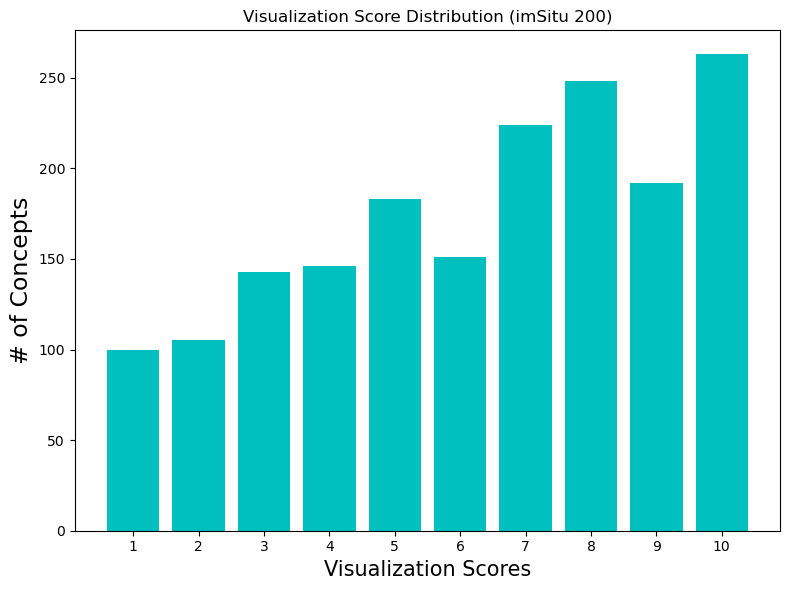

In [3]:
# Plot individual n per visualization score

plt.figure(figsize=(8, 6))
plt.bar(scores, n_scores, color='c')
plt.title('Visualization Score Distribution (imSitu 200)')
plt.xticks(scores)
plt.xlabel('Visualization Scores', fontsize=15)
plt.ylabel('# of Concepts', fontsize=17)
plt.tight_layout()
plt.savefig('results/plots/imSitu_200_visualization_scores_distribution.png', dpi=300)
plt.show()

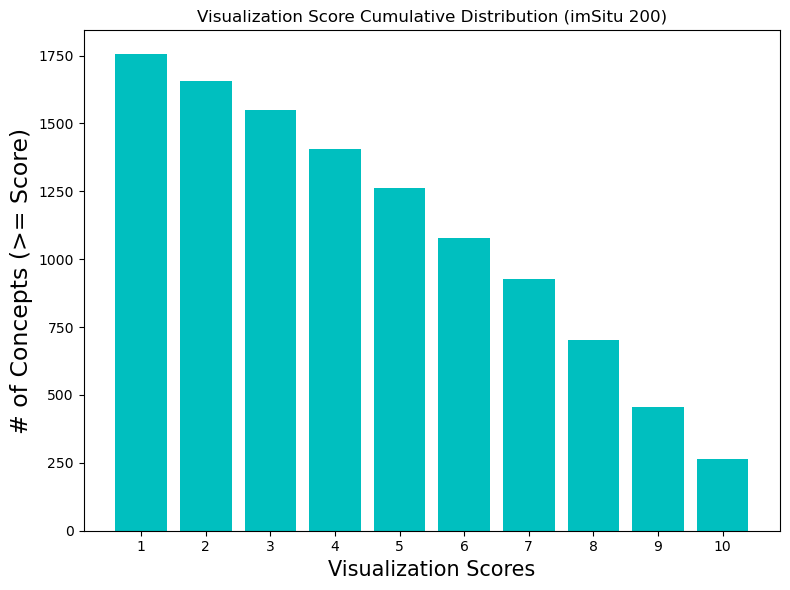

In [4]:
# Plot cummulative n per visualization score

n_cum = [sum(n_scores[i:]) for i in range(10)]

plt.figure(figsize=(8, 6))
plt.bar(scores, n_cum, color='c')
plt.title('Visualization Score Cumulative Distribution (imSitu 200)')
plt.xticks(scores)
plt.xlabel('Visualization Scores', fontsize=15)
plt.ylabel('# of Concepts (>= Score)', fontsize=17)
plt.tight_layout()
plt.savefig('results/plots/imSitu_200_visualization_scores_cum_distribution.png', dpi=300)
plt.show()

In [5]:
models_full = ["Baseline", "CBM",] + [str(i) for i in scores]
accuracies_full = [0.3126, 0.3162]
parities_full = [.0313, 0.0305]

# read the results from the visual results files
for score in models_full[2:]:
    
    with open("results/imSitu/visual/visual_{}/200_verbs_full/accuracies_by_group.csv".format(score), "r") as f:
        lines = f.read().split("\n")
        total_accuracy = float(lines[-2].split(',')[1])
        A_parity = float(lines[-4].split(',')[-2])
        if lines[-4].split(',')[-1] == "female":
            A_parity *= -1
        B_parity = float(lines[-3].split(',')[-2])
        if lines[-3].split(',')[-1] == "female":
            B_parity *= -1
        total_parity = (abs(A_parity) + abs(B_parity))/2
        
        accuracies_full.append(total_accuracy)
        parities_full.append(total_parity)

In [6]:
models_full

['Baseline', 'CBM', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

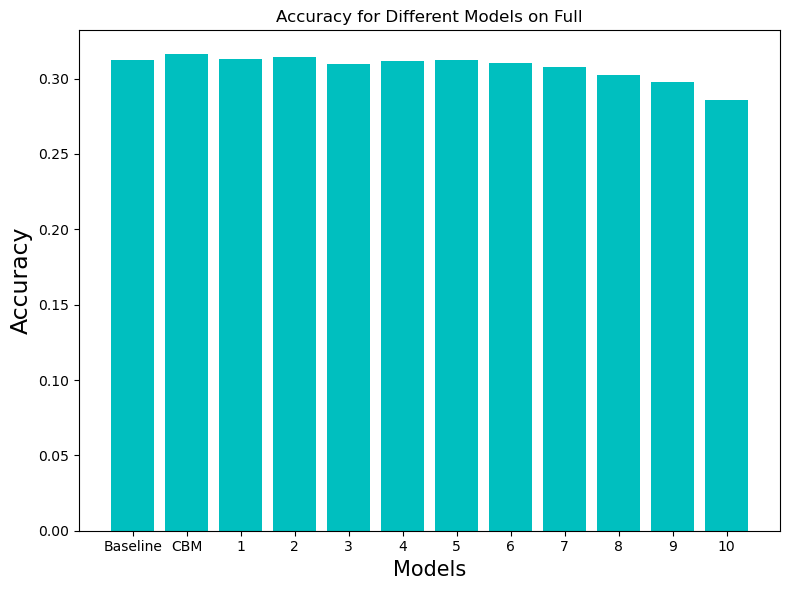

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(models_full, accuracies_full, color='c')
plt.title('Accuracy for Different Models on Full')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Accuracy', fontsize=17)
plt.tight_layout()
plt.savefig('results/plots/imSitu_200_full_visual_accuracies.png', dpi=300)
plt.show()

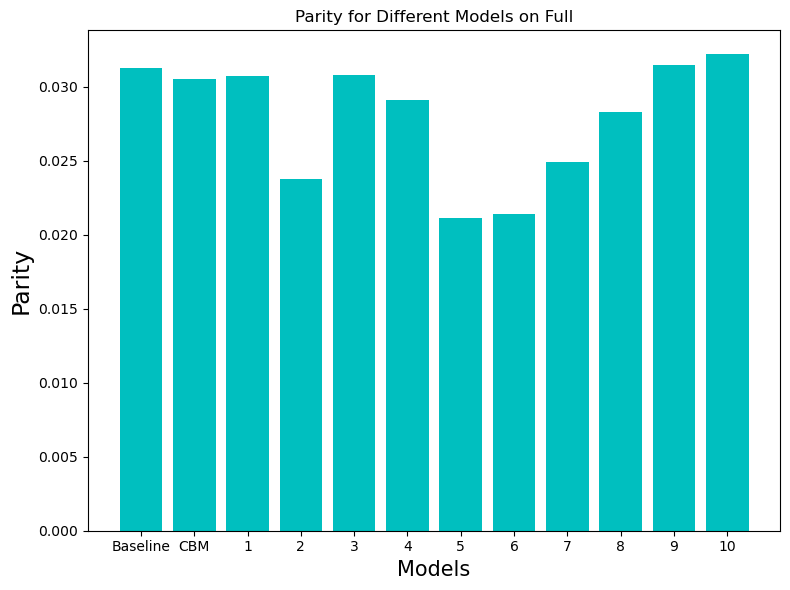

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(models_full, parities_full, color='c')
plt.title('Parity for Different Models on Full')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Parity', fontsize=17)
plt.tight_layout()
plt.savefig('results/plots/imSitu_200_full_visual_parities.png', dpi=300)
plt.show()

In [13]:
models_balanced = ["Baseline", "CBM",] + [str(i) for i in scores]
accuracies_balanced = [0.2655, 0.2752]
parities_balanced = [0.0046, 0.0061]

# read the results from the visual results files
for score in models_balanced[2:]:
    
    with open("results/imSitu/visual/visual_{}/200_verbs_balanced/accuracies_by_group.csv".format(score), "r") as f:
        lines = f.read().split("\n")
        total_accuracy = float(lines[-2].split(',')[1])
        A_parity = float(lines[-4].split(',')[-2])
        if lines[-4].split(',')[-1] == "female":
            A_parity *= -1
        B_parity = float(lines[-3].split(',')[-2])
        if lines[-3].split(',')[-1] == "female":
            B_parity *= -1
        total_parity = (abs(A_parity) + abs(B_parity))/2
        
        accuracies_balanced.append(total_accuracy)
        parities_balanced.append(total_parity)

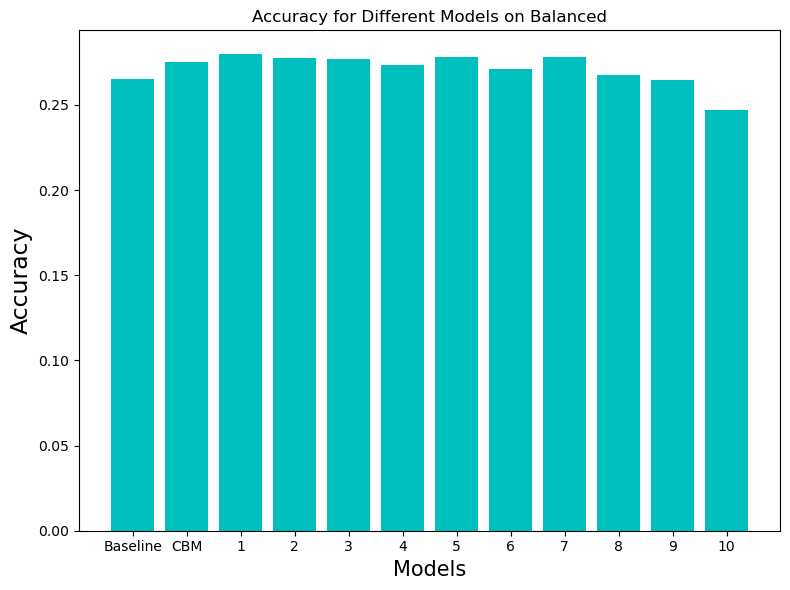

In [14]:
plt.figure(figsize=(8, 6))
plt.bar(models_balanced, accuracies_balanced, color='c')
plt.title('Accuracy for Different Models on Balanced')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Accuracy', fontsize=17)
plt.tight_layout()
plt.savefig('results/plots/imSitu_200_balanced_visual_accuracies.png', dpi=300)
plt.show()

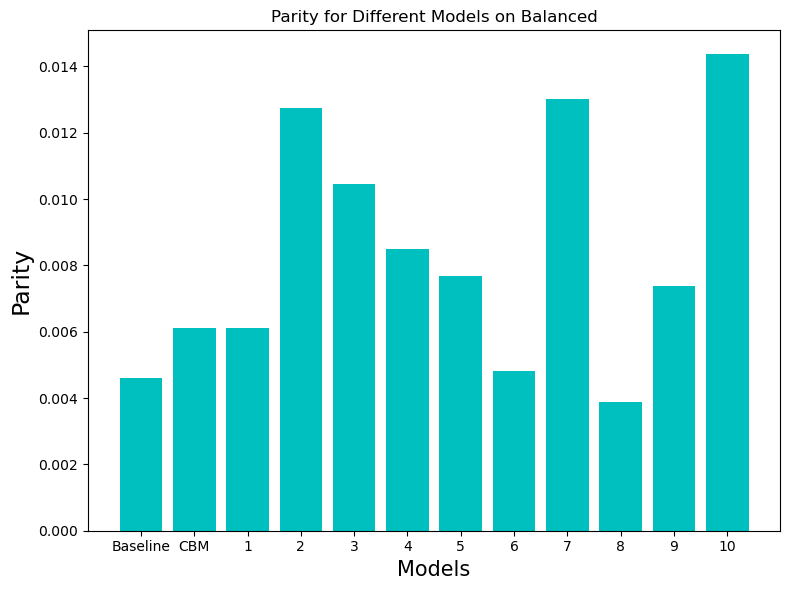

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(models_balanced, parities_balanced, color='c')
plt.title('Parity for Different Models on Balanced')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Parity', fontsize=17)
plt.tight_layout()
plt.savefig('results/plots/imSitu_200_balanced_visual_parities.png', dpi=300)
plt.show()